In [109]:
import pandas as pd
import numpy as np
import tabula
import matplotlib.pyplot as plt
import random
import pycountry
import geopandas
%matplotlib inline

In [5]:
#Number of Nobel prize winner vs schooling and GDP per capita by country
nobel=pd.read_csv('data/complete.csv')

In [6]:
nobel.head()

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN


In [ ]:
nobel.info()

In [7]:
nobel.category.unique()

array(['Economic Sciences', 'Physics', 'Chemistry', 'Peace',
       'Physiology or Medicine', 'Literature'], dtype=object)

In [8]:
#Exclude category for Peace and Literature since we are working on science categories 
nobel_science_df=nobel[~((nobel.category=='Peace') | (nobel.category=='Literature'))]

In [9]:
nobel_science_df.category.unique()

array(['Economic Sciences', 'Physics', 'Chemistry',
       'Physiology or Medicine'], dtype=object)

In [10]:
#filling Nan(s) with 'no_affiliation' for  affiliation columns
nobel_science_df['affiliation_1'] = nobel_science_df['affiliation_1'].fillna("no_affiliation")
nobel_science_df['affiliation_2'] = nobel_science_df['affiliation_2'].fillna("no_affiliation")
nobel_science_df['affiliation_3'] = nobel_science_df['affiliation_3'].fillna("no_affiliation")
nobel_science_df['affiliation_4'] = nobel_science_df['affiliation_4'].fillna("no_affiliation")

/home/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [11]:
nobel_science_df['country_of_affiliation_1']=nobel_science_df['affiliation_1'].apply(lambda x: x.split(',')[-1].strip())
nobel_science_df['country_of_affiliation_2']=nobel_science_df['affiliation_2'].apply(lambda x: x.split(',')[-1].strip())
nobel_science_df['country_of_affiliation_3']=nobel_science_df['affiliation_3'].apply(lambda x: x.split(',')[-1].strip())
nobel_science_df['country_of_affiliation_4']=nobel_science_df['affiliation_4'].apply(lambda x: x.split(',')[-1].strip())

/home/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [12]:
nobel_science_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 947
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   awardYear                   700 non-null    int64 
 1   category                    700 non-null    object
 2   categoryFullName            700 non-null    object
 3   sortOrder                   700 non-null    int64 
 4   portion                     700 non-null    object
 5   prizeAmount                 700 non-null    int64 
 6   prizeAmountAdjusted         700 non-null    int64 
 7   dateAwarded                 372 non-null    object
 8   prizeStatus                 700 non-null    object
 9   motivation                  700 non-null    object
 10  categoryTopMotivation       20 non-null     object
 11  award_link                  700 non-null    object
 12  id                          700 non-null    int64 
 13  name                        700 non-null    object

In [13]:
#Check residences 
nobel_science_df[['fullName','birth_country','birth_countryNow','death_country','death_countryNow','residence_1','residence_2','ind_or_org','country_of_affiliation_1','country_of_affiliation_2','country_of_affiliation_3','country_of_affiliation_4']][nobel_science_df.residence_1.notnull()]

,fullName,birth_country,birth_countryNow,death_country,death_countryNow,residence_1,residence_2,ind_or_org,country_of_affiliation_1,country_of_affiliation_2,country_of_affiliation_3,country_of_affiliation_4
409,J. Robin Warren,Australia,Australia,NaN,NaN,"Perth, Australia",NaN,Individual,no_affiliation,no_affiliation,no_affiliation,no_affiliation
505,Kary B. Mullis,USA,USA,USA,USA,"La Jolla, CA, USA",NaN,Individual,no_affiliation,no_affiliation,no_affiliation,no_affiliation
577,Martinus J.G. Veltman,the Netherlands,the Netherlands,NaN,NaN,"Bilthoven, the Netherlands",NaN,Individual,no_affiliation,no_affiliation,no_affiliation,no_affiliation
899,Werner Forssmann,Germany,Germany,West Germany,Germany,"Bad Kreuznach, Germany",NaN,Individual,Germany,no_affiliation,no_affiliation,no_affiliation
921,William S. Knowles,USA,USA,USA,USA,"St. Louis, MO, USA",NaN,Individual,no_affiliation,no_affiliation,no_affiliation,no_affiliation


In [14]:
#Check residence 
nobel_science_df[['fullName','birth_country','birth_countryNow','death_country','death_countryNow','residence_1','residence_2','ind_or_org','country_of_affiliation_1','country_of_affiliation_2','country_of_affiliation_3','country_of_affiliation_4']][nobel_science_df.residence_2.notnull()]

,fullName,birth_country,birth_countryNow,death_country,death_countryNow,residence_1,residence_2,ind_or_org,country_of_affiliation_1,country_of_affiliation_2,country_of_affiliation_3,country_of_affiliation_4


In [15]:
#Check all pure science winners 
nobel_science_df[['fullName','birth_country','birth_countryNow','death_country','death_countryNow','country_of_affiliation_1','country_of_affiliation_2','country_of_affiliation_3','country_of_affiliation_4']]

,fullName,birth_country,birth_countryNow,death_country,death_countryNow,country_of_affiliation_1,country_of_affiliation_2,country_of_affiliation_3,country_of_affiliation_4
0,A. Michael Spence,USA,USA,NaN,NaN,USA,no_affiliation,no_affiliation,no_affiliation
1,Aage Niels Bohr,Denmark,Denmark,Denmark,Denmark,Denmark,no_affiliation,no_affiliation,no_affiliation
2,Aaron Ciechanover,British Protectorate of Palestine,Israel,NaN,NaN,Israel,no_affiliation,no_affiliation,no_affiliation
3,Aaron Klug,Lithuania,Lithuania,NaN,NaN,United Kingdom,no_affiliation,no_affiliation,no_affiliation
4,Abdus Salam,India,Pakistan,United Kingdom,United Kingdom,Italy,United Kingdom,no_affiliation,no_affiliation
...,...,...,...,...,...,...,...,...,...
942,Zhores I. Alferov,USSR,Belarus,Russia,Russia,Russia,no_affiliation,no_affiliation,no_affiliation
943,Frederick Sanger,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,no_affiliation,no_affiliation,no_affiliation
945,John Bardeen,USA,USA,USA,USA,USA,no_affiliation,no_affiliation,no_affiliation
946,Linus Carl Pauling,USA,USA,USA,USA,USA,no_affiliation,no_affiliation,no_affiliation


In [16]:
# check Birth country VS Death Country
nobel_science_df[['fullName','birth_country','country_of_affiliation_1','country_of_affiliation_2','country_of_affiliation_3','country_of_affiliation_4']][nobel_science_df['birth_countryNow']!=nobel_science_df['country_of_affiliation_1']]

,fullName,birth_country,country_of_affiliation_1,country_of_affiliation_2,country_of_affiliation_3,country_of_affiliation_4
3,Aaron Klug,Lithuania,United Kingdom,no_affiliation,no_affiliation,no_affiliation
4,Abdus Salam,India,Italy,United Kingdom,no_affiliation,no_affiliation
5,Abhijit Banerjee,India,USA,no_affiliation,no_affiliation,no_affiliation
13,Ahmed H. Zewail,Egypt,USA,no_affiliation,no_affiliation,no_affiliation
19,Alan G. MacDiarmid,New Zealand,USA,no_affiliation,no_affiliation,no_affiliation
...,...,...,...,...,...,...
938,Yoichiro Nambu,Japan,USA,no_affiliation,no_affiliation,no_affiliation
940,Yuan T. Lee,Taiwan,USA,no_affiliation,no_affiliation,no_affiliation
941,Yves Chauvin,Belgium,France,no_affiliation,no_affiliation,no_affiliation
942,Zhores I. Alferov,USSR,Russia,no_affiliation,no_affiliation,no_affiliation


In [85]:
# check 10 random winners whose Birth Country differs from Counrty of Affiliation for schooling counnrty  
cadidates_for_random=np.array(nobel_science_df[['fullName']][nobel_science_df['birth_countryNow']!=nobel_science_df['country_of_affiliation_1']])
cadidates_for_random
random.choices(cadidates_for_random, k=20)

[array(['Guglielmo Marconi'], dtype=object),
 array(['Richard Henderson'], dtype=object),
 array(['J. Robin Warren'], dtype=object),
 array(['William S. Knowles'], dtype=object),
 array(['Friedrich Bergius'], dtype=object),
 array(['Georg von Békésy'], dtype=object),
 array(['Tadeus Reichstein'], dtype=object),
 array(['Polykarp Kusch'], dtype=object),
 array(['Torsten N. Wiesel'], dtype=object),
 array(['Konstantin Novoselov'], dtype=object),
 array(['Hans Karl August Simon von Euler-Chelpin'], dtype=object),
 array(['Amartya Sen'], dtype=object),
 array(['Otto Wallach'], dtype=object),
 array(['Georges J.F. Köhler'], dtype=object),
 array(['Maurice Hugh Frederick Wilkins'], dtype=object),
 array(['Martinus J.G. Veltman'], dtype=object),
 array(['Peter Grünberg'], dtype=object),
 array(['Salvador E. Luria'], dtype=object),
 array(['Richard Adolf Zsigmondy'], dtype=object),
 array(['Peter Brian Medawar'], dtype=object)]

In [151]:
#Decided to move with Birth Counrty as final feature field to pursue analysis against other scholling data set
#final columns need
nobel_science_final=nobel_science_df[['fullName', 'birth_countryNow']]
nobel_science_final

,fullName,birth_countryNow
0,A. Michael Spence,USA
1,Aage Niels Bohr,Denmark
2,Aaron Ciechanover,Israel
3,Aaron Klug,Lithuania
4,Abdus Salam,Pakistan
...,...,...
942,Zhores I. Alferov,Belarus
943,Frederick Sanger,United Kingdom
945,John Bardeen,USA
946,Linus Carl Pauling,USA


In [152]:
grouped_nobel=nobel_science_final.groupby('birth_countryNow').count()
grouped_nobel['birth_countryNow']=grouped_nobel.index
grouped_nobel

,fullName,birth_countryNow
birth_countryNow,,
Algeria,1,Algeria
Argentina,2,Argentina
Australia,10,Australia
Austria,15,Austria
Azerbaijan,1,Azerbaijan
Belarus,2,Belarus
Belgium,5,Belgium
Bosnia and Herzegovina,1,Bosnia and Herzegovina
Brazil,1,Brazil


In [20]:
nobel_science_final.birth_countryNow.unique()

array(['USA', 'Denmark', 'Israel', 'Lithuania', 'Pakistan', 'India',
       'Germany', 'Egypt', 'Japan', 'United Kingdom', 'New Zealand',
       'Poland', 'Belgium', 'France', 'Hungary', 'Australia', 'Russia',
       'South Africa', 'Sweden', 'Scotland', 'Canada', 'Finland',
       'Turkey', 'Venezuela', 'the Netherlands', 'Argentina', 'Italy',
       'Czech Republic', 'Switzerland', 'South Korea', 'China', 'Cyprus',
       'Algeria', 'Norway', 'Portugal', 'Austria', 'Ireland', 'Slovenia',
       'Luxembourg', 'Romania', 'Ukraine', 'Croatia', 'Azerbaijan',
       'Mexico', 'Faroe Islands (Denmark)', 'Brazil', 'Slovakia', 'Spain',
       'Morocco', 'Belarus', 'Saint Lucia', 'Bosnia and Herzegovina',
       'Latvia', 'Indonesia', 'Taiwan'], dtype=object)

In [202]:
# generate country code  based on country name 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            if country=='Faroe Islands (Denmark)':
                country='Denmark'
            if country=='South Korea':
                country='Korea, Republic of'
            else:
                code=pycountry.countries.search_fuzzy(country)[0].alpha_3

           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
            
    return CODE# create a column for code 
grouped_nobel['CODE']=alpha3code(grouped_nobel.birth_countryNow)
grouped_nobel
grouped_nobel.rename(columns={'fullName': 'count_of_winners'}, inplace=True)
grouped_nobel

,count_of_winners,birth_countryNow,CODE
birth_countryNow,,,
Algeria,1,Algeria,DZA
Argentina,2,Argentina,ARG
Australia,10,Australia,AUS
Austria,15,Austria,AUT
Azerbaijan,1,Azerbaijan,AZE
Belarus,2,Belarus,BLR
Belgium,5,Belgium,BEL
Bosnia and Herzegovina,1,Bosnia and Herzegovina,BIH
Brazil,1,Brazil,BRA


In [204]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']# then merge with our data 
merge=pd.merge(world,grouped_nobel,on='CODE')# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='count_of_winners',ascending=False).reset_index()


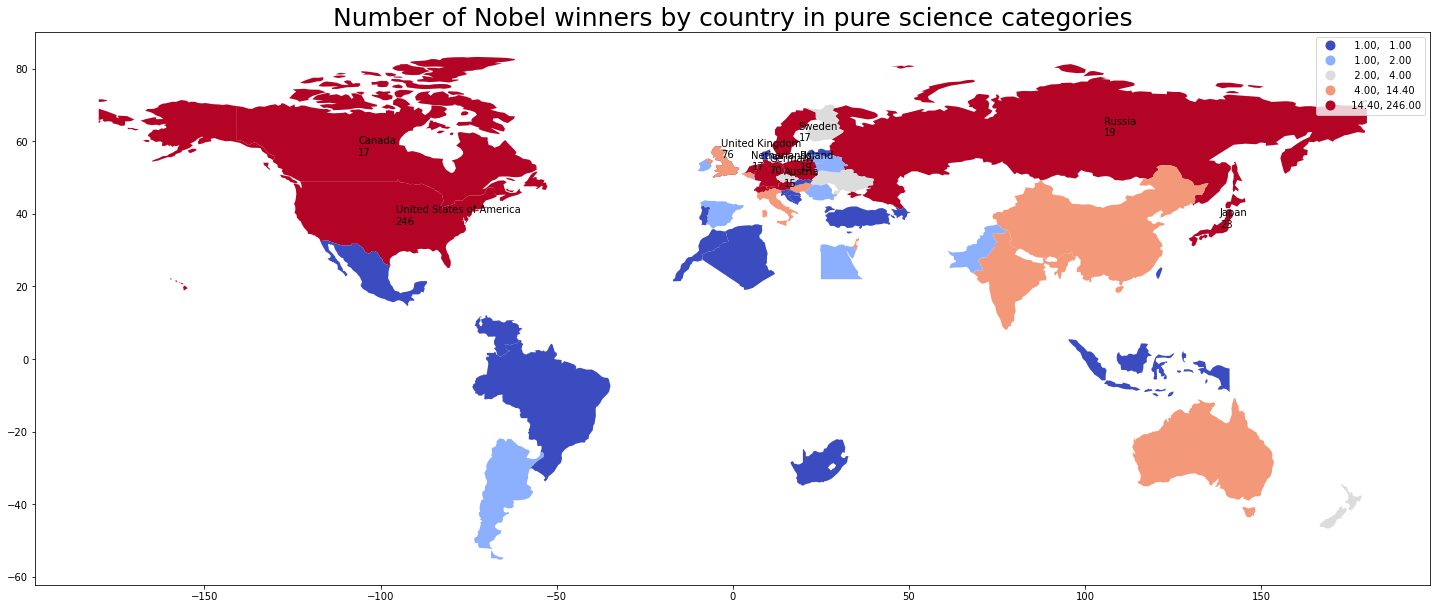

In [118]:
# plot confirmed cases world map 
merge.plot(column='count_of_winners', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Number of Nobel winners by country in pure science categories',fontsize=25)# add countries names and numbers 
for i in range(0,10):
    try:
        plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.count_of_winners[i]),size=10)
    except:
        pass
plt.show()

In [120]:
top_20_countries=merge[:20]

<AxesSubplot:title={'center':'Top 20 Countries with Nobel winners in pure science'}, ylabel='birth_countryNow'>

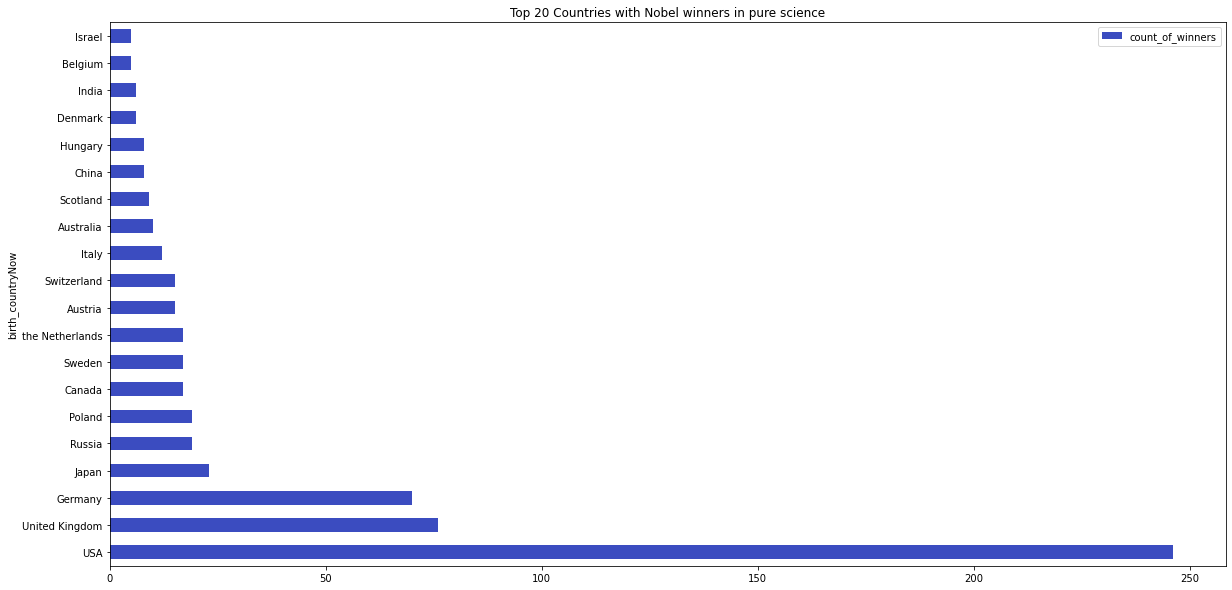

In [126]:
top_20_countries.plot(x='birth_countryNow',y='count_of_winners',kind='barh', colormap='coolwarm', figsize=(20,10), title='Top 20 Countries with Nobel winners in pure science')

In [ ]:
#plot grouped countries per number of winner from those countries 

plt.style.use('ggplot')
# x = ['Macron', 'Le Pen']
# tweets = [res_lepen.count(), res_macron.count()]
plt.figure(figsize=(30,7))
x_pos = [i for i, _ in enumerate(most_common_words)]
plt.hist(top_20_city)
plt.xlabel("City")
plt.ylabel("Number of tweets associated")
plt.title("Number of tweets associated per city for Macron")
plt.xticks(x_pos, most_common_words)
plt.tight_layout()
# plt.show()

In [220]:
# Calculate mean age of winner at time of award
nobel_science_age=nobel_science_df[['awardYear','birth_date','fullName', 'birth_countryNow']]
nobel_science_age['birth_year']=nobel_science_age['birth_date'].str.slice(start=0,stop=4)
nobel_science_age['birth_year']=nobel_science_age['birth_year'].astype('int64')

nobel_science_age['Age of winner at the award time']=nobel_science_age['awardYear']-nobel_science_age['birth_year']

# grouped_nobel=nobel_science_final.groupby('birth_countryNow').count()
# grouped_nobel['birth_countryNow']=grouped_nobel.index
# grouped_nobel

nobel_science_age



/home/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,awardYear,birth_date,fullName,birth_countryNow,birth_year,Age of winner at the award time
0,2001,1943-00-00,A. Michael Spence,USA,1943,58
1,1975,1922-06-19,Aage Niels Bohr,Denmark,1922,53
2,2004,1947-10-01,Aaron Ciechanover,Israel,1947,57
3,1982,1926-08-11,Aaron Klug,Lithuania,1926,56
4,1979,1926-01-29,Abdus Salam,Pakistan,1926,53
...,...,...,...,...,...,...
942,2000,1930-03-15,Zhores I. Alferov,Belarus,1930,70
943,1980,1918-08-13,Frederick Sanger,United Kingdom,1918,62
945,1972,1908-05-23,John Bardeen,USA,1908,64
946,1954,1901-02-28,Linus Carl Pauling,USA,1901,53


<AxesSubplot:title={'center':'Top 20 Countries with Nobel winners in pure science'}, xlabel='Age of winner at the award time'>

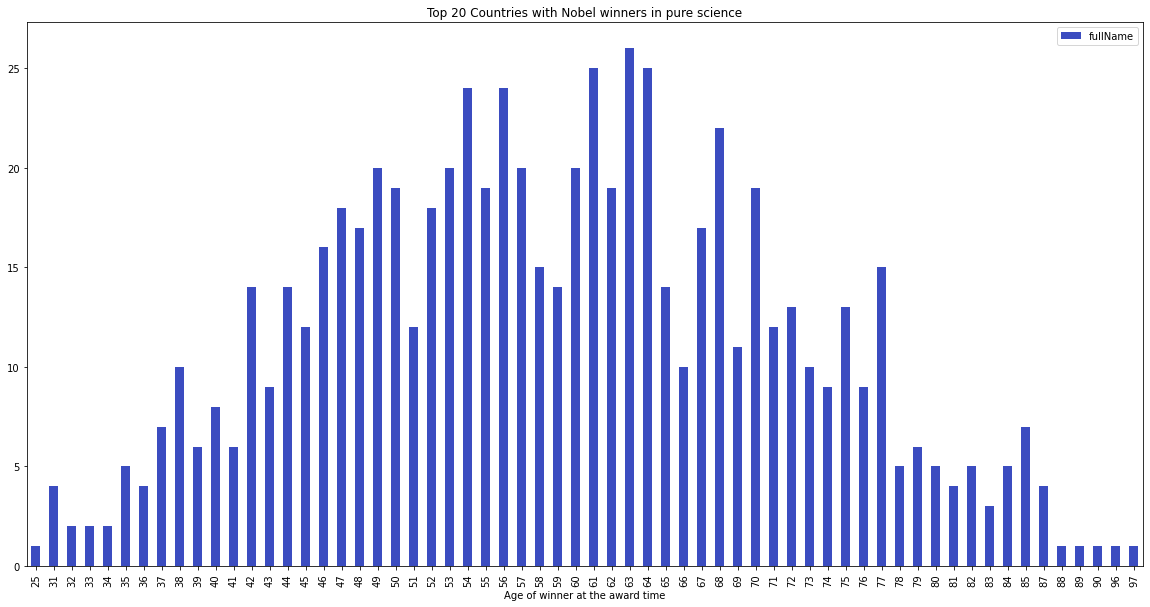

In [222]:
nobel_science_age_mean=nobel_science_age[['Age of winner at the award time','fullName']]
grouped_age_mean=nobel_science_age_mean.groupby('Age of winner at the award time').count()
grouped_age_mean['Age of winner at the award time']=grouped_age.index
grouped_age_mean.sort_index(inplace=True)
grouped_age_mean.plot(x='Age of winner at the award time',y='fullName',kind='bar', colormap='coolwarm', figsize=(20,10), title='Top 20 Countries with Nobel winners in pure science')

In [219]:
#find mean age of award winner
np.mean(nobel_science_age['Age of winner at the award time'])

58.85142857142857

In [225]:
#Determine school start year for each winner and assume that starting age for start schooling is 6 (average)
avg_schoool_start_age=6
nobel_science_age['Year of schooling start of winner']=nobel_science_age['birth_year']+avg_schoool_start_age
nobel_science_age

/home/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,awardYear,birth_date,fullName,birth_countryNow,birth_year,Age of winner at the award time,Year of schooling start of winner
0,2001,1943-00-00,A. Michael Spence,USA,1943,58,1949
1,1975,1922-06-19,Aage Niels Bohr,Denmark,1922,53,1928
2,2004,1947-10-01,Aaron Ciechanover,Israel,1947,57,1953
3,1982,1926-08-11,Aaron Klug,Lithuania,1926,56,1932
4,1979,1926-01-29,Abdus Salam,Pakistan,1926,53,1932
...,...,...,...,...,...,...,...
942,2000,1930-03-15,Zhores I. Alferov,Belarus,1930,70,1936
943,1980,1918-08-13,Frederick Sanger,United Kingdom,1918,62,1924
945,1972,1908-05-23,John Bardeen,USA,1908,64,1914
946,1954,1901-02-28,Linus Carl Pauling,USA,1901,53,1907


In [239]:
#Merge with CODE nobel_science_age and grouped_nobel
grouped_nobel.reset_index(drop=True, inplace=True)
merged_for_code=nobel_science_age.merge(grouped_nobel, how='left', on='birth_countryNow')
merged_for_code

,awardYear,birth_date,fullName,birth_countryNow,birth_year,Age of winner at the award time,Year of schooling start of winner,count_of_winners,CODE
0,2001,1943-00-00,A. Michael Spence,USA,1943,58,1949,246,USA
1,1975,1922-06-19,Aage Niels Bohr,Denmark,1922,53,1928,6,DNK
2,2004,1947-10-01,Aaron Ciechanover,Israel,1947,57,1953,5,ISR
3,1982,1926-08-11,Aaron Klug,Lithuania,1926,56,1932,2,LTU
4,1979,1926-01-29,Abdus Salam,Pakistan,1926,53,1932,2,PAK
...,...,...,...,...,...,...,...,...,...
695,2000,1930-03-15,Zhores I. Alferov,Belarus,1930,70,1936,2,BLR
696,1980,1918-08-13,Frederick Sanger,United Kingdom,1918,62,1924,76,GBR
697,1972,1908-05-23,John Bardeen,USA,1908,64,1914,246,USA
698,1954,1901-02-28,Linus Carl Pauling,USA,1901,53,1907,246,USA


In [240]:
gdp_schooling=pd.read_csv('data/correlation-between-mean-years-of-schooling-and-gdp-per-capita.csv')

In [128]:
gdp_schooling.count()

Entity                                                        46950
Code                                                          46148
Year                                                          46950
Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))     9985
Total years of schooling (Lee-Lee (2016))                      3219
Total population (Gapminder, HYDE & UN)                       46883
Continent                                                       285
dtype: int64

In [227]:
gdp_schooling.head()

,Entity,Code,Year,Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),Total years of schooling (Lee-Lee (2016)),"Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1870,NaN,0.01,4169690.0,NaN
2,Afghanistan,AFG,1875,NaN,0.01,4285744.0,NaN
3,Afghanistan,AFG,1880,NaN,0.01,4419695.0,NaN
4,Afghanistan,AFG,1885,NaN,0.01,4562304.0,NaN


In [243]:
#MERGE with Schooling dataset to add Total years of schooling to Nobel data set per year of start school and Country Code
gdp_schooling.rename(columns={'Code': 'CODE'}, inplace=True)
merged_for_schoolling=merged_for_code.merge(gdp_schooling, how='left', left_on=['CODE','Year of schooling start of winner'], right_on=['CODE','Year'])

In [244]:
merged_for_schoolling

,awardYear,birth_date,fullName,birth_countryNow,birth_year,Age of winner at the award time,Year of schooling start of winner,count_of_winners,CODE,Entity,Year,Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),Total years of schooling (Lee-Lee (2016)),"Total population (Gapminder, HYDE & UN)",Continent
0,2001,1943-00-00,A. Michael Spence,USA,1943,58,1949,246,USA,United States,1949,NaN,NaN,154449952.0,NaN
1,1975,1922-06-19,Aage Niels Bohr,Denmark,1922,53,1928,6,DNK,Denmark,1928,NaN,NaN,3496235.0,NaN
2,2004,1947-10-01,Aaron Ciechanover,Israel,1947,57,1953,5,ISR,Israel,1953,5098.7344,NaN,1525000.0,NaN
3,1982,1926-08-11,Aaron Klug,Lithuania,1926,56,1932,2,LTU,Lithuania,1932,NaN,NaN,2182537.0,NaN
4,1979,1926-01-29,Abdus Salam,Pakistan,1926,53,1932,2,PAK,Pakistan,1932,NaN,NaN,24194508.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2000,1930-03-15,Zhores I. Alferov,Belarus,1930,70,1936,2,BLR,Belarus,1936,NaN,NaN,6842100.0,NaN
696,1980,1918-08-13,Frederick Sanger,United Kingdom,1918,62,1924,76,GBR,United Kingdom,1924,NaN,NaN,44942040.0,NaN
697,1972,1908-05-23,John Bardeen,USA,1908,64,1914,246,USA,United States,1914,NaN,NaN,101146656.0,NaN
698,1954,1901-02-28,Linus Carl Pauling,USA,1901,53,1907,246,USA,United States,1907,NaN,NaN,88838848.0,NaN


<AxesSubplot:title={'center':'Total years of Schooling in timerange'}, xlabel='Year'>

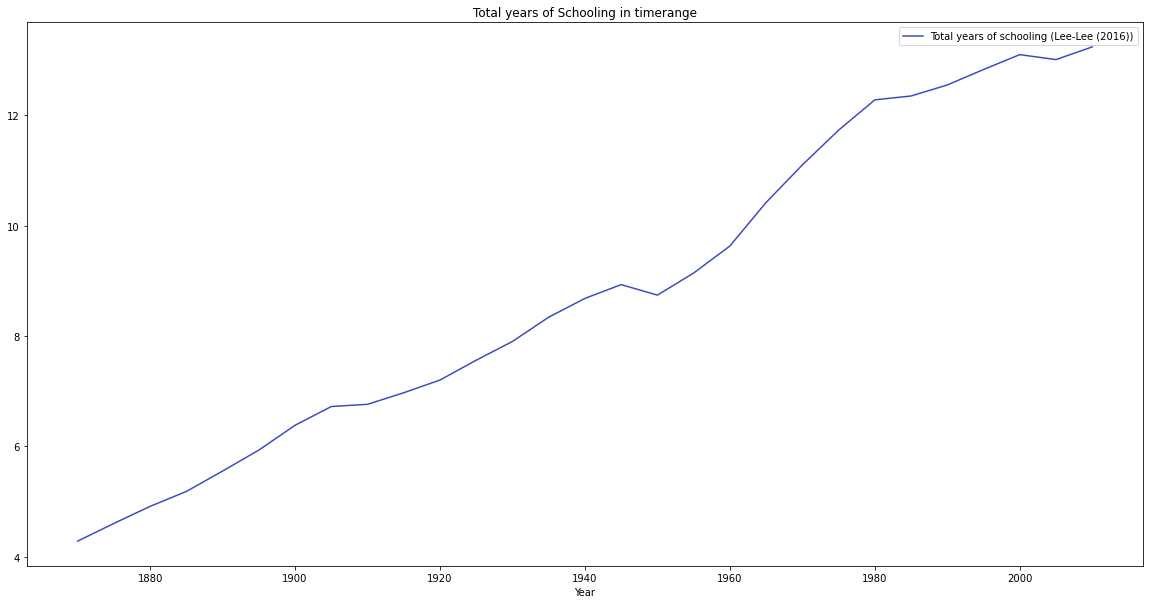

In [242]:
#US Only
gdp_schooling_US=gdp_schooling[gdp_schooling.Entity=='United States']
#DROP Nan(s)
gdp_schooling_US=gdp_schooling_US[gdp_schooling_US['Total years of schooling (Lee-Lee (2016))'].notnull()]
gdp_schooling_US.sort_values(by='Year',inplace=True)
gdp_schooling_US.plot(x='Year',y='Total years of schooling (Lee-Lee (2016))',kind='line', colormap='coolwarm', figsize=(20,10), title='Total years of Schooling in timerange')

In [146]:
#DROP Nan(s)
gdp_schooling_US=gdp_schooling_US[gdp_schooling_US['Total years of schooling (Lee-Lee (2016))'].notnull()]
gdp_schooling_US.sort_values(by='Year')

,Entity,Code,Year,Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),Total years of schooling (Lee-Lee (2016)),"Total population (Gapminder, HYDE & UN)",Continent
44449,United States,USA,1870,NaN,4.28,40899168.0,NaN
44450,United States,USA,1875,NaN,4.60,45854328.0,NaN
44451,United States,USA,1880,NaN,4.91,51402380.0,NaN
44452,United States,USA,1885,NaN,5.18,57461504.0,NaN
44453,United States,USA,1890,NaN,5.55,64051772.0,NaN
44454,United States,USA,1895,NaN,5.93,70738200.0,NaN
44455,United States,USA,1900,NaN,6.38,77781472.0,NaN
44456,United States,USA,1905,NaN,6.72,85524304.0,NaN
44457,United States,USA,1910,NaN,6.76,94088792.0,NaN
44458,United States,USA,1915,NaN,6.97,102789832.0,NaN


In [ ]:
#US Only
gdp_schooling_US=gdp_schooling[gdp_schooling.Entity=='United States']
#DROP Nan(s)
gdp_schooling_US=gdp_schooling_US[gdp_schooling_US['Total years of schooling (Lee-Lee (2016))'].notnull()]
gdp_schooling_US.sort_values(by='Year',inplace=True)
gdp_schooling_US.plot(x='Year',y='Total years of schooling (Lee-Lee (2016))',kind='line', colormap='coolwarm', figsize=(20,10), title='Total years of Schooling in timerange')